In [ ]:
# @title Download
!pip install --quiet -U --no-cache-dir gdown --pre
!gdown 1sOrhdqlcoLhdp2wDl_qCNuJzUl6V0zLA

Downloading...
From: https://drive.google.com/uc?id=1sOrhdqlcoLhdp2wDl_qCNuJzUl6V0zLA
To: /content/phasic_tonic.npy
100% 1.50M/1.50M [00:00<00:00, 82.5MB/s]


# Load the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_metadata(metaname):
  """
  Parameters
  ----------
  metaname: str
    metaname consists of rat number, study day, condition, treatment value, trial number
    and phasic/tonic states followed by the REM epoch index, each separated by underscore.
    Example: Rat2_SD4_HC_2_posttrial1_tonic0

  Returns
  -------
  metadata: dict
   Dictionary object which contains each conditions.
  """
  metadata = {}

  metaname  = metaname.split('_')
  metadata["rat_id"]    = int(metaname[0][-1])
  metadata["study_day"] = int(metaname[1][-1])
  metadata["condition"] = metaname[2]
  metadata["treatment"] = int(metaname[3])
  metadata["trial_num"] = int(metaname[4][-1])
  metadata["state"]     = metaname[5][:-1]
  return metadata

# Load the file
# The file is a dict object in a format of {name:{episodes, power_spectrum}}
# Each spectrum contains the power values up to 100 Hz.
# Each episodes is a list of durations of segments

combined_data = np.load('phasic_tonic.npy', allow_pickle='TRUE').item()

In [ ]:
for metaname in combined_data.keys():
  metadata = get_metadata(metaname)

  power_spectrum  = combined_data["power_spectrum"]
  episode         = combined_data["episode"]

  #
  # Further analysis
  #


## Example 1: Plotting phasic and tonic power spectrum of RGS14 dataset

In [ ]:
phasic_spectrum = []
tonic_spectrum  = []

for metaname in combined_data.keys():
  metadata = get_metadata(metaname)

  data = combined_data[metaname]
  power_spectrum  = data["power_spectrum"]
  episode         = data["episode"]

  if metadata["treatment"] >= 2: # Select the RGS14 dataset
    if metadata["state"] == "tonic":
      tonic_spectrum.append(power_spectrum)
    else:
      phasic_spectrum.append(power_spectrum)

spectrum_phasic = np.vstack(phasic_spectrum)
spectrum_tonic = np.vstack(tonic_spectrum)

phasic_spectrum_mean = np.mean(spectrum_phasic, axis=0)
tonic_spectrum_mean = np.mean(spectrum_tonic, axis=0)

phasic_spectrum_err = np.std(spectrum_phasic, axis=0)/(len(spectrum_phasic)**0.5)
tonic_spectrum_err = np.std(spectrum_tonic, axis=0)/(len(spectrum_tonic)**0.5)

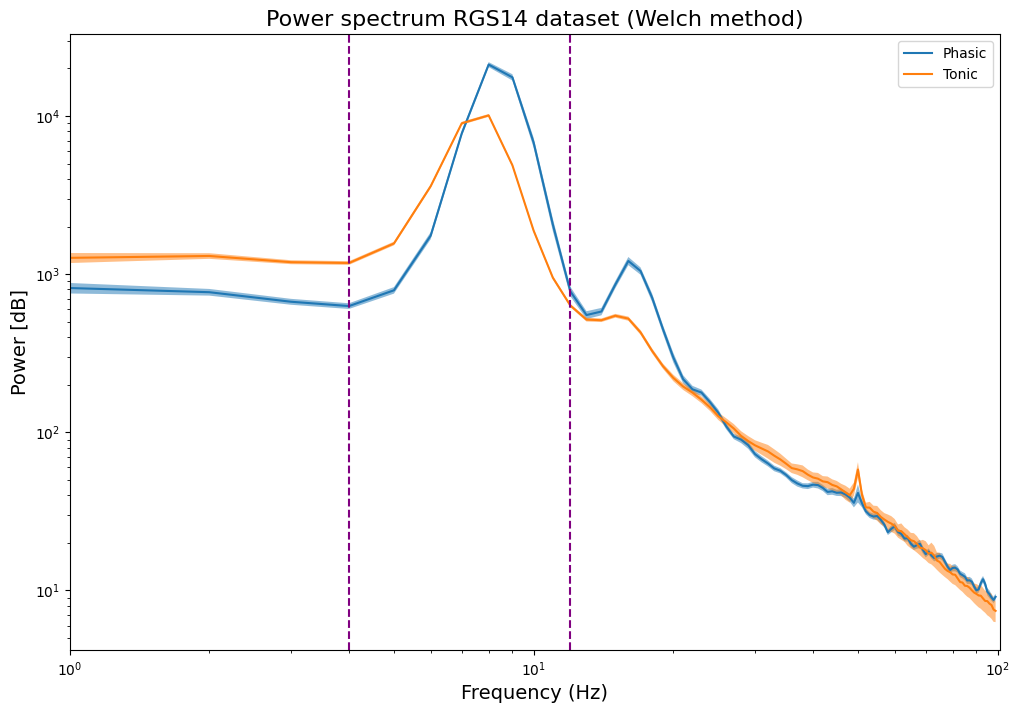

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(phasic_spectrum_mean)
plt.plot(tonic_spectrum_mean)

plt.fill_between(np.arange(100), phasic_spectrum_mean - phasic_spectrum_err,
                 phasic_spectrum_mean + phasic_spectrum_err,
                 alpha=0.5, label='Standard Error of Phasic Spectrum')

plt.fill_between(np.arange(100), tonic_spectrum_mean - tonic_spectrum_err,
                 tonic_spectrum_mean + tonic_spectrum_err,
                 alpha=0.5, label='Standard Error of Tonic Spectrum')

plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Power [dB]', fontsize=14)

plt.yscale('log')
plt.xscale('log')

plt.xlim((1, 101))

plt.axvline(x=4, color='purple', linestyle='--')
plt.axvline(x=12, color='purple', linestyle='--')

plt.title('Power spectrum RGS14 dataset (Welch method)', fontsize=16)
plt.legend(['Phasic', 'Tonic'])

# Example 2: Plotting the episodic durations of RGS14 dataset by conditions

In [ ]:
ep = {"episode":[]}

for metaname in combined_data.keys():
  metadata = get_metadata(metaname)

  data = combined_data[metaname]
  episode         = data["episode"]

  if len(episode.shape) == 0:
    episode = episode.reshape(1)

  # Divide by the conditions
  for condition in metadata.keys():
    if condition not in ep.keys():
      ep[condition] = []

  for e in episode:
    ep["episode"].append(e)
    for condition in metadata.keys():
      ep[condition].append(metadata[condition])

ep_df = pd.DataFrame({key:pd.Series(value) for key, value in ep.items()})

#RGS14 dataset idx
rgs_idx = ep_df["treatment"] >= 2
#CBD dataset idx
cbd_idx = ep_df["treatment"] < 2

ep_df.loc[rgs_idx, "episode"] /= 1000
ep_df.loc[cbd_idx, "episode"] /= 2500

[Text(0.5, 1.0, 'Phasic episodic durations (RGS14 dataset)')]

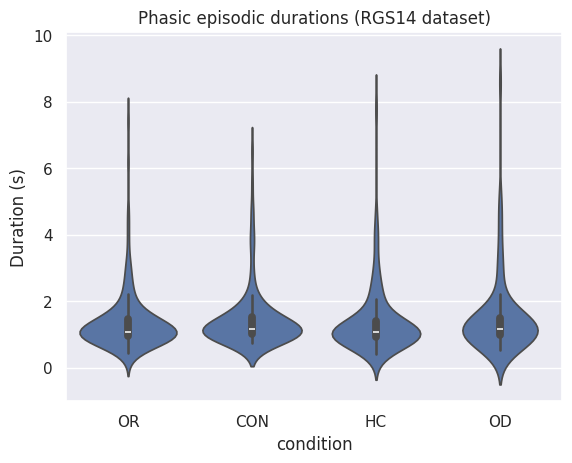

In [ ]:
sns.set_theme()
ep_df = ep_df.rename(columns={'episode':'Duration (s)'})
sns.violinplot(data=ep_df[ep_df["state"]=='phasic'], x="condition", y="Duration (s)").set(title="Phasic episodic durations (RGS14 dataset)")

[Text(0.5, 1.0, 'Tonic episodic durations (RGS14 dataset)')]

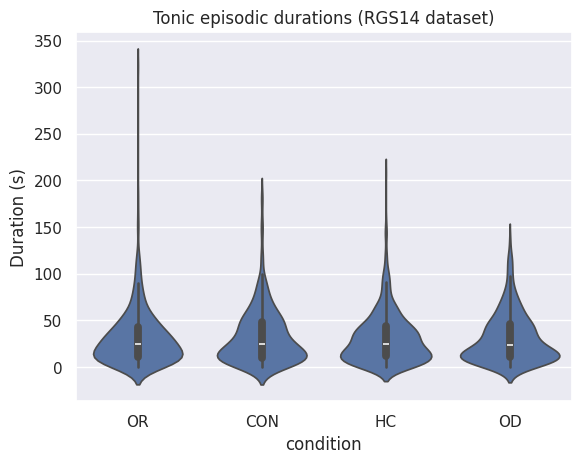

In [ ]:
sns.violinplot(data=ep_df[ep_df["state"]=='tonic'], x="condition", y="Duration (s)").set(title="Tonic episodic durations (RGS14 dataset)")

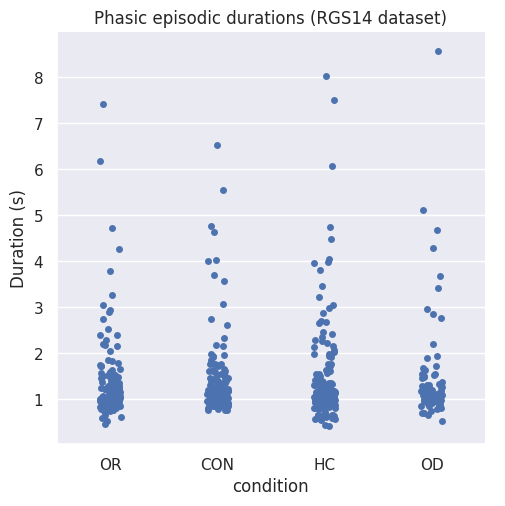

In [ ]:
sns.catplot(data=ep_df[ep_df["state"]=='phasic'], x="condition", y="Duration (s)").set(title="Phasic episodic durations (RGS14 dataset)")

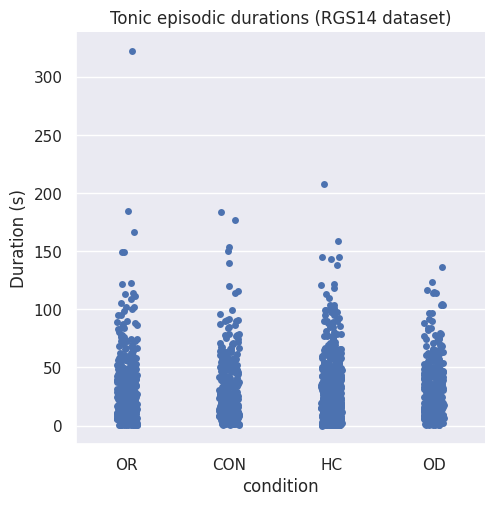

In [ ]:
sns.catplot(data=ep_df[ep_df["state"]=='tonic'], x="condition", y="Duration (s)").set(title="Tonic episodic durations (RGS14 dataset)")

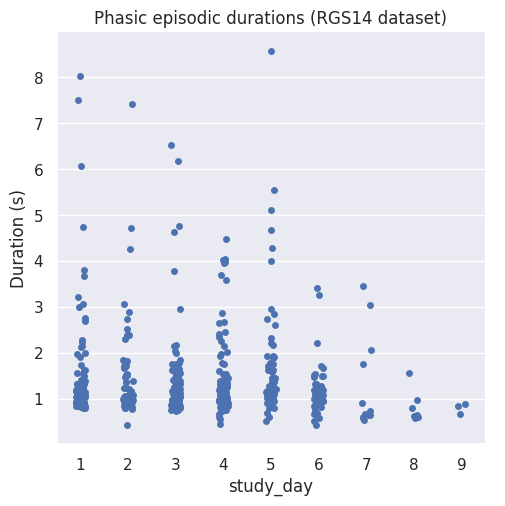

In [ ]:
sns.catplot(data=ep_df[ep_df["state"]=='phasic'], x="study_day", y="Duration (s)").set(title="Phasic episodic durations (RGS14 dataset)")

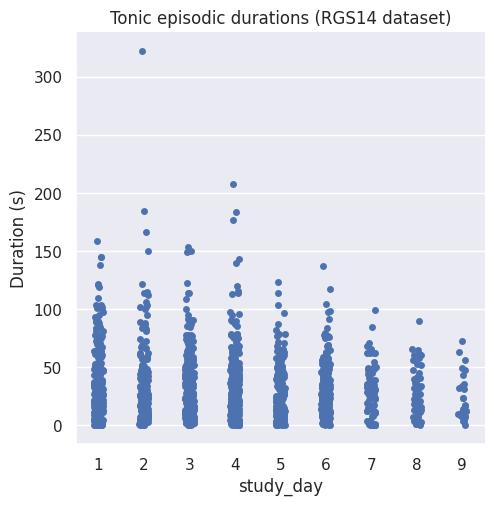

In [ ]:
sns.catplot(data=ep_df[ep_df["state"]=='tonic'], x="study_day", y="Duration (s)").set(title="Tonic episodic durations (RGS14 dataset)")

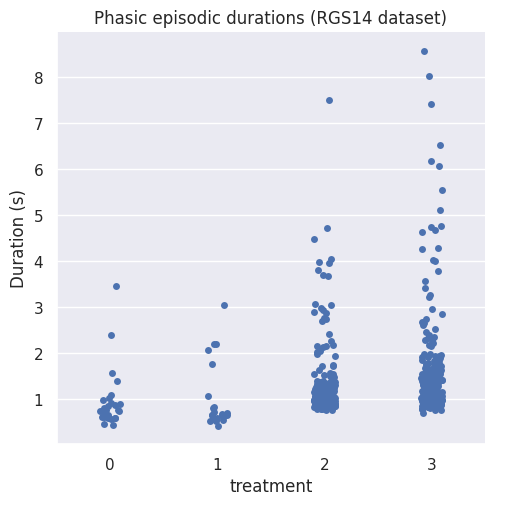

In [ ]:
sns.catplot(data=ep_df[ep_df["state"]=='phasic'], x="treatment", y="Duration (s)").set(title="Phasic episodic durations (RGS14 dataset)")

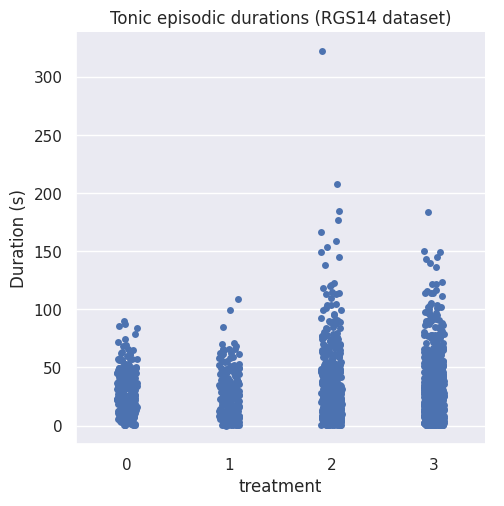

In [ ]:
sns.catplot(data=ep_df[ep_df["state"]=='tonic'], x="treatment", y="Duration (s)").set(title="Tonic episodic durations (RGS14 dataset)")